# Notebook to Look at SMELT results 


In [40]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LogNorm
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools, viz_tools)

%matplotlib inline

In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [10]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
tmask = mesh_mask.variables['tmask'][:]

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/results/SalishSea/nowcast-green/14aug16/'
date = datetime.datetime(2016, 8, 14)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][0,:,:,:]
print (nitrateF.shape)

initial = '/results/SalishSea/nowcast-green/14jan16/'
ni = results_dataset(initial, datetime.datetime(2016, 1, 14), 1, '1h', 'ptrc_T')
#print (ni.variables.keys())
#nitrate0 = ni.variables['TRNNO3'][0,:]
nitrate0 = ni.variables['NO3'][0,:,:,:]

/results/SalishSea/nowcast-green/14aug16/SalishSea_1h_20160814_20160814_ptrc_T.nc
(40, 898, 398)
/results/SalishSea/nowcast-green/14jan16/SalishSea_1h_20160114_20160114_ptrc_T.nc


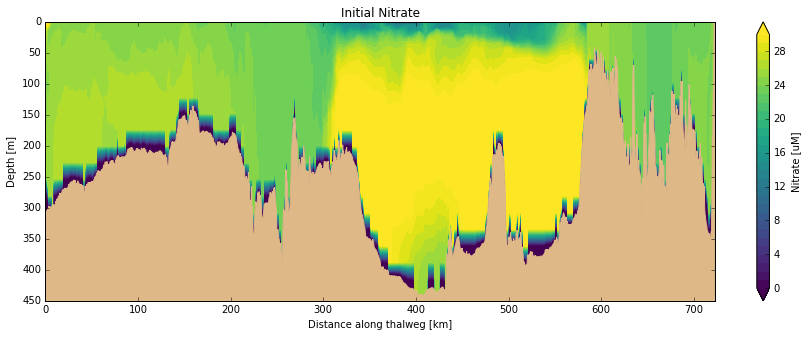

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 31., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

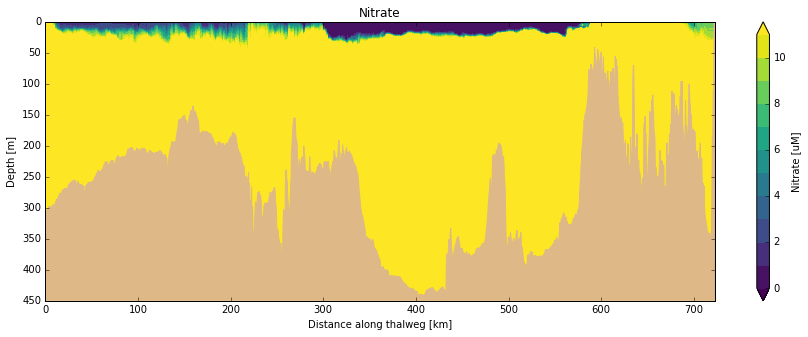

In [11]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate')

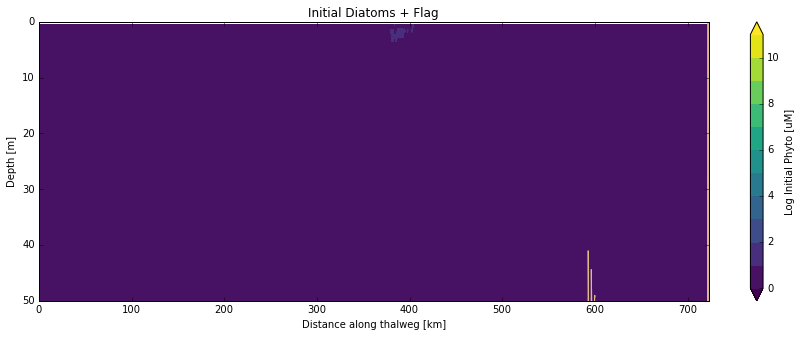

In [7]:
phyto0 = ni.variables['PHY'][0,:] + ni.variables['PHY2'][0,:]
clevels = np.arange(0, 12, 1.)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, phyto0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([50,0])
cbar.set_label('Log Initial Phyto [uM]')
ax.set_title('Initial Diatoms + Flag');

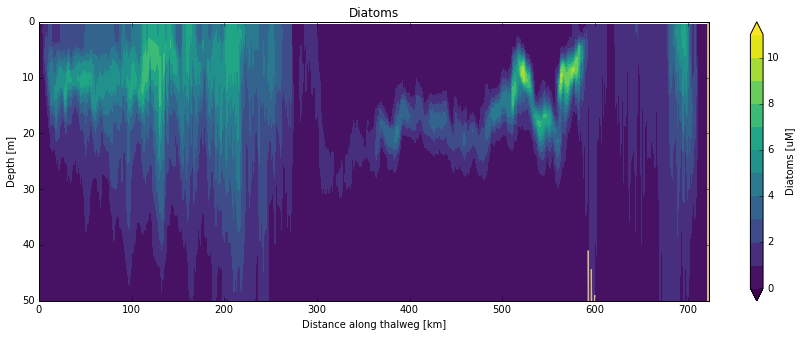

In [12]:
diatoms = ptrc_T.variables['PHY2'][0,:,:,:] 
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, diatoms, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([50,0])
cbar.set_label('Diatoms [uM]')
ax.set_title('Diatoms');

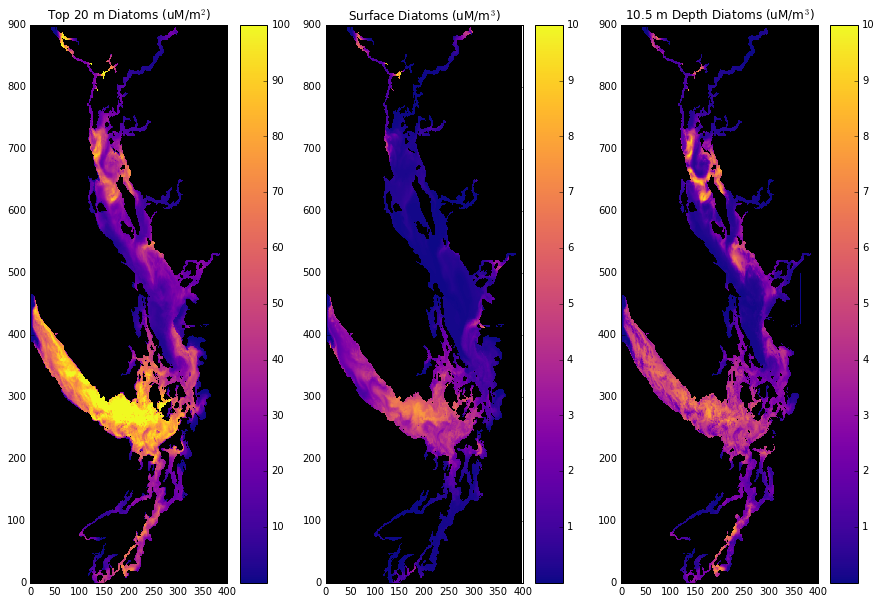

In [13]:
diatoms_masked = np.ma.array(diatoms[0:20], mask=np.logical_not(tmask[0, 0:20]))
sum_diatoms = np.sum(diatoms_masked, axis=0)
fig, ax = plt.subplots(1, 3, figsize=(15,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(sum_diatoms, cmap=cmap, vmax = 100)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Top 20 m Diatoms (uM/m$^2$)')
mesh = ax[1].pcolormesh(diatoms_masked[0], cmap=cmap, vmax = 10)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Diatoms (uM/m$^3$)')
mesh = ax[2].pcolormesh(diatoms_masked[11], cmap=cmap, vmax= 10)
ax[2].set_title('10.5 m Depth Diatoms (uM/m$^3$)')
fig.colorbar(mesh, ax=ax[2])

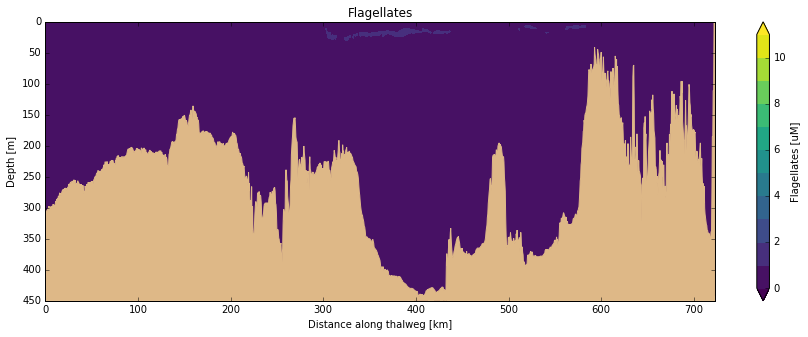

In [14]:
flag = ptrc_T.variables['PHY'][0,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, flag, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Flagellates [uM]')
ax.set_title('Flagellates');

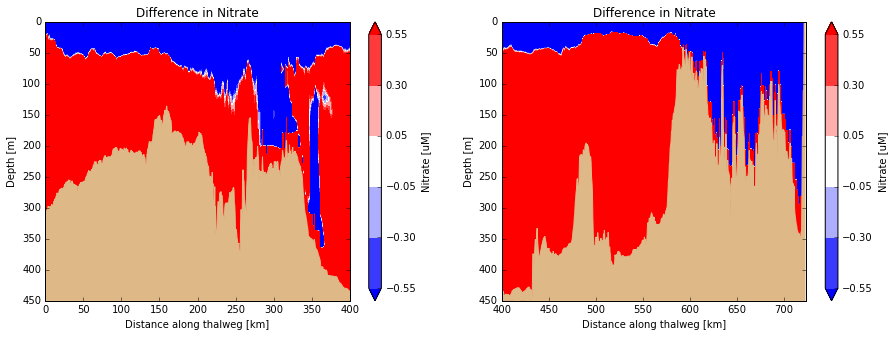

In [15]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
clevels = [-0.55, -0.3, -0.05, 0.05, 0.3, 0.55]

cbar = vis.contour_thalweg(ax[0], nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[0].set_ylim([450,0])
ax[0].set_xlim([0,400])
cbar.set_label('Nitrate [uM]')
ax[0].set_title('Difference in Nitrate')

cbar = vis.contour_thalweg(ax[1], nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[1].set_ylim([450,0])
ax[1].set_xlim([400, 724])
cbar.set_label('Nitrate [uM]')
ax[1].set_title('Difference in Nitrate')

In [ ]:
print (ptrc_T.variables.keys())
#nitrateF = ptrc_T.variables['NO3'][:,:,:,:]


In [13]:
for v in ptrc_T.variables.keys():
    print (v, np.max(ptrc_T.variables[v][:]))

DOC 17.9814
MICZ 3.33046
MYRI 2.08737
NH4 7.2663
NO3 45.2287
O2 4506.66
PHY 3.80859
PHY2 14.1644
POC 2.28843
Si 102.265
area 239355.0
bSi 11.9662
bounds_lat 51.1048
bounds_lon -121.318
deptht 441.466
deptht_bounds 454.932
nav_lat 51.1048
nav_lon -121.318
time_centered 3679300800.0
time_centered_bounds 3679344000.0
time_counter 3679300800.0
time_counter_bounds 3679344000.0


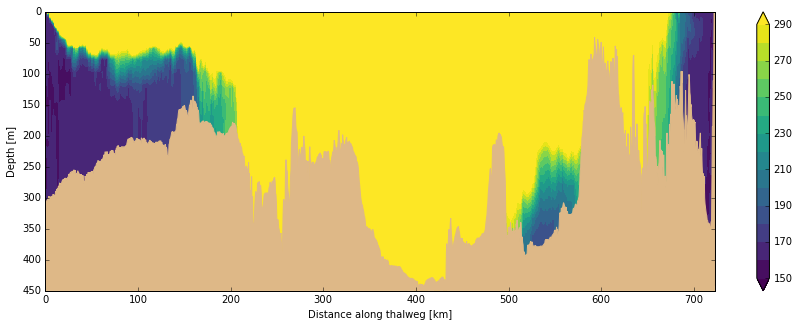

In [16]:
oxy = ptrc_T.variables['O2'][0, :]
clevels = np.arange(150, 300, 10)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, oxy, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0]);


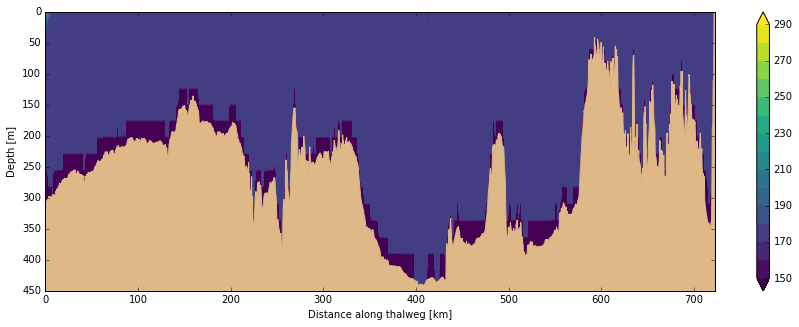

In [17]:
oxy_in = ni.variables['O2'][0, :]
clevels = np.arange(150, 300, 10)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, oxy_in, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0]);

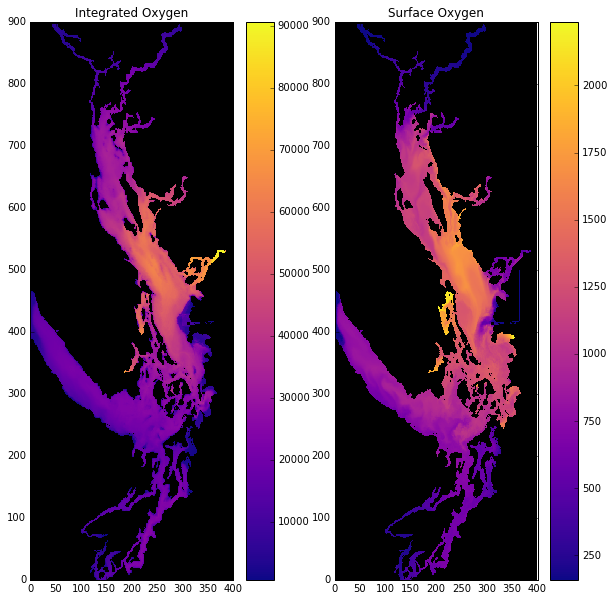

In [18]:
oxy_masked = np.ma.array(oxy, mask=np.logical_not(tmask[0]))
sum_oxy = np.sum(oxy_masked, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(sum_oxy, cmap=cmap)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Integrated Oxygen')
mesh = ax[1].pcolormesh(oxy_masked[0], cmap=cmap)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Oxygen')

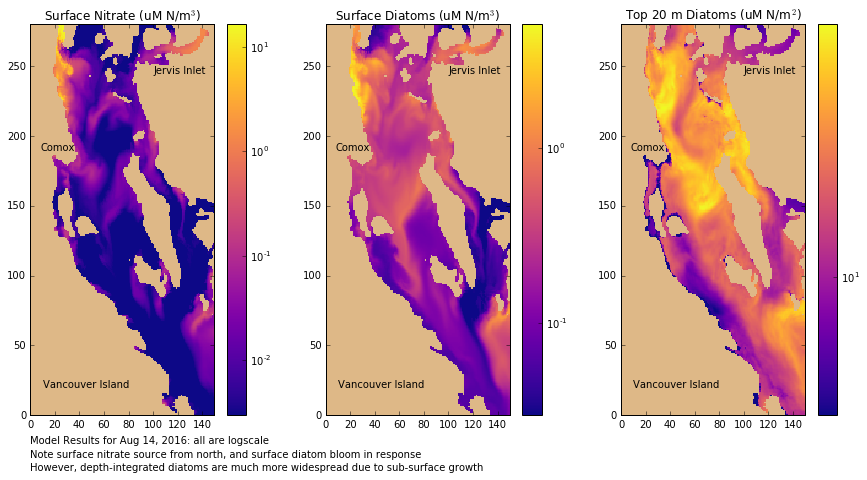

In [56]:
imax=750; imin = 470; jmin=100; jmax=250
diatoms_masked = np.ma.array(diatoms[0:20], mask=np.logical_not(tmask[0, 0:20]))
nitrate_masked = np.ma.array(nitrateF[0:20], mask=np.logical_not(tmask[0, 0:20]))
sum_diatoms = np.sum(diatoms_masked, axis=0)
fig, ax = plt.subplots(1, 3, figsize=(15, 7))
cmap = plt.get_cmap('plasma')
cmap.set_bad('burlywood')
mesh = ax[2].pcolormesh(sum_diatoms[imin:imax, jmin:jmax], cmap=cmap, norm=matplotlib.colors.LogNorm(), vmin=3)
fig.colorbar(mesh, ax=ax[2])
ax[2].set_title('Top 20 m Diatoms (uM N/m$^2$)')

mesh = ax[1].pcolormesh(diatoms_masked[0, imin:imax, jmin:jmax], cmap=cmap, norm=matplotlib.colors.LogNorm() ,vmin=0.03)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Diatoms (uM N/m$^3$)')
mesh = ax[0].pcolormesh(nitrate_masked[0, imin:imax, jmin:jmax], cmap=cmap, norm=matplotlib.colors.LogNorm(), vmin=0.003)
ax[0].set_title('Surface Nitrate (uM N/m$^3$)')
fig.colorbar(mesh, ax=ax[0])
for axi in ax:
    viz_tools.set_aspect(axi)
    axi.set_xlim((0,150))
    axi.set_ylim((0,280))
    axi.text(10, 20, 'Vancouver Island')
    axi.text(100, 245, 'Jervis Inlet')
    axi.text(8, 190, 'Comox')
ax[0].text(0, -20, 'Model Results for Aug 14, 2016: all are logscale')
ax[0].text(0, -30, 'Note surface nitrate source from north, and surface diatom bloom in response')
ax[0].text(0, -40, 'However, depth-integrated diatoms are much more widespread due to sub-surface growth')